In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from adjustText import adjust_text
from matplotlib import gridspec
%matplotlib inline

### M/F Weights by Phenotypic Variance

In [42]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\Phenotypes')
df_vars = pd.read_csv("pheno_variances_bysex.txt", sep="\t")
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df_weights = pd.read_csv("sum_mash_weights.txt", sep="\t")
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
df_h2 = pd.read_csv("h2_mf.txt", sep="\t")

os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')

In [43]:
df_vars = df_vars[df_vars['pheno'].isin(df_weights['phenotype'])].copy()
df_vars = df_vars.sort_values('pheno').reset_index(drop=True)
df_weights = df_weights.sort_values('phenotype').reset_index(drop=True)
df_h2 = df_h2.sort_values('phenotype').reset_index(drop=True)

df_vars['ratio_m/f'] = df_vars['m_var'] / df_vars['f_var']
df_weights['diff_m-f'] = df_weights['sum_weight_m'] - df_weights['sum_weight_f']

#### pheno var, diff

<ipython-input-47-2febea3d1451>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


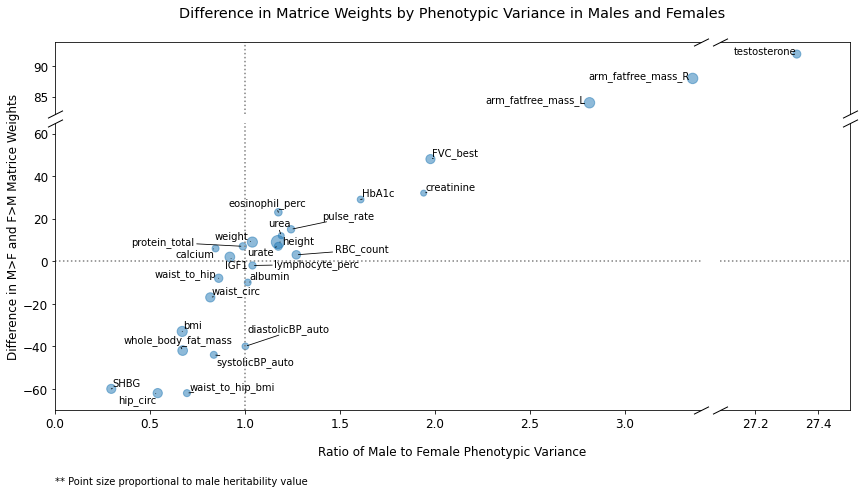

In [47]:
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 2, hspace=0.05, wspace=0.05, width_ratios=[5,1], height_ratios=[1,4])
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

x=df_vars['ratio_m/f']
y=df_weights['diff_m-f']

# zoom in per subplots
size = df_h2.male_h2 * 400
#size=20
ax1.scatter(x=x, y=y, s=size, alpha = 0.5)
ax2.scatter(x=x, y=y, s=size, alpha = 0.5)
ax3.scatter(x=x, y=y, s=size, alpha = 0.5)

ax2.set_xlim(27.09, 27.5)  # outliers 
ax2.set_ylim(82.2, 94)
ax3.set_xlim(0, 3.4)
ax3.set_ylim(-70, 65.1)

# hide spines
ax1.spines['right'].set_visible(False) ; ax1.spines['bottom'].set_visible(False) ; ax1.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.spines['bottom'].set_visible(False) ; ax2.xaxis.set_visible(False) ; ax2.yaxis.set_visible(False)
ax3.spines['right'].set_visible(False) ; ax3.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False) ; ax4.spines['top'].set_visible(False) ; ax4.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12) ; ax3.tick_params(labelsize=12) ; ax4.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 0], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1], [0, 1], transform=ax4.transAxes, **kwargs)

#annotations
outliers = ['testosterone', 'arm_fatfree_mass_L', 'arm_fatfree_mass_R']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_vars = df_vars.loc[~df_vars['pheno'].isin(outliers)].reset_index(drop=True)
main_x=main_vars['ratio_m/f']
main_y=main_weights['diff_m-f']
texts = [ax3.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle="-",lw=0.8))

x_out = df_vars.loc[df_vars.pheno=='testosterone', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['diff_m-f']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')
x_out = df_vars.loc[df_vars.pheno=='arm_fatfree_mass_L', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_L', ['diff_m-f']]
texts = ax1.text(x_out.values-0.55,y_out.values+0.01,'arm_fatfree_mass_L')
x_out = df_vars.loc[df_vars.pheno=='arm_fatfree_mass_R', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_R', ['diff_m-f']]
texts = ax1.text(x_out.values-0.55,y_out.values+0.01,'arm_fatfree_mass_R')

#lines
ax3.axvline(1, ls=":",c="gray") ; ax1.axvline(1, ls=":",c="gray")
ax3.axhline(ls=":",c="gray") ; ax4.axhline(ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Phenotypic Variance", fontsize='large', labelpad=35)
plt.ylabel("Difference in M>F and F>M Matrice Weights", fontsize='large', labelpad=35)
plt.title("Difference in Matrice Weights by Phenotypic Variance in Males and Females", fontsize="x-large", y=1.05)
plt.text(0,-0.2,'** Point size proportional to male heritability value')

plt.tight_layout()
#plt.savefig("phenovar_diff_msize.pdf")


#### pheno var, male

<ipython-input-50-3f8cc7cfd68c>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


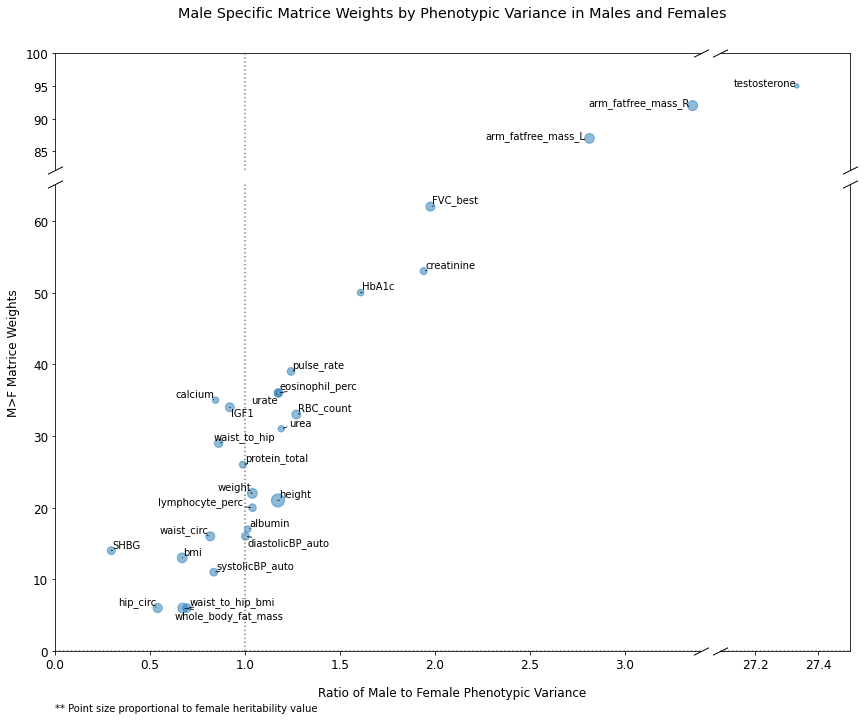

In [50]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, hspace=0.05, wspace=0.05, width_ratios=[5,1], height_ratios=[1,4])
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')


x=df_vars['ratio_m/f']
y=df_weights['sum_weight_m']

# zoom in per subplots
size = df_h2.female_h2 * 400
ax1.scatter(x=x, y=y, s=size, alpha=0.5)
ax2.scatter(x=x, y=y, s=size, alpha=0.5)
ax3.scatter(x=x, y=y, s=size, alpha=0.5)

ax2.set_xlim(27.09, 27.5)  # outliers 
ax2.set_ylim(82.2, 100)
ax3.set_xlim(0, 3.4)
ax3.set_ylim(0, 65.1)

# hide spines
ax1.spines['right'].set_visible(False) ; ax1.spines['bottom'].set_visible(False) ; ax1.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.spines['bottom'].set_visible(False) ; ax2.xaxis.set_visible(False) ; ax2.yaxis.set_visible(False)
ax3.spines['right'].set_visible(False) ; ax3.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False) ; ax4.spines['top'].set_visible(False) ; ax4.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12) ; ax3.tick_params(labelsize=12) ; ax4.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 0], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1], [0, 1], transform=ax4.transAxes, **kwargs)

#annotations
outliers = ['testosterone', 'arm_fatfree_mass_L', 'arm_fatfree_mass_R']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_vars = df_vars.loc[~df_vars['pheno'].isin(outliers)].reset_index(drop=True)
main_x=main_vars['ratio_m/f']
main_y=main_weights['sum_weight_m']
texts = [ax3.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle="-",lw=0.8))

x_out = df_vars.loc[df_vars.pheno=='testosterone', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['sum_weight_m']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')
x_out = df_vars.loc[df_vars.pheno=='arm_fatfree_mass_L', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_L', ['sum_weight_m']]
texts = ax1.text(x_out.values-0.55,y_out.values+0.01,'arm_fatfree_mass_L')
x_out = df_vars.loc[df_vars.pheno=='arm_fatfree_mass_R', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_R', ['sum_weight_m']]
texts = ax1.text(x_out.values-0.55,y_out.values+0.01,'arm_fatfree_mass_R')

#lines
ax3.axvline(1, ls=":",c="gray") ; ax1.axvline(1, ls=":",c="gray")
ax3.axhline(ls=":",c="gray") ; ax4.axhline(ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Phenotypic Variance", fontsize='large', labelpad=35)
plt.ylabel("M>F Matrice Weights", fontsize='large', labelpad=35)
plt.title("Male Specific Matrice Weights by Phenotypic Variance in Males and Females", fontsize="x-large", y=1.05)
plt.text(0,-0.1,'** Point size proportional to female heritability value')

plt.tight_layout()
#plt.savefig("phenovar_m_fsize.pdf")

#### pheno var, female

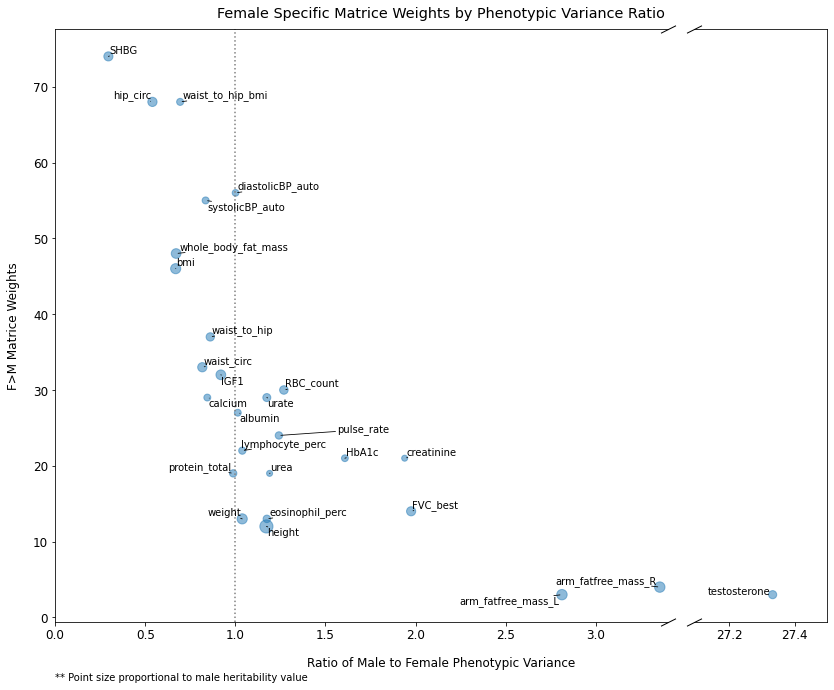

In [52]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 5)
ax1 = fig.add_subplot(gs[:,:4])
ax2 = fig.add_subplot(gs[:,4:5])

x=df_vars['ratio_m/f']
y=df_weights['sum_weight_f']

# zoom in per subplots
size = df_h2.male_h2 * 400
ax1.scatter(x=x, y=y, s=size, alpha=0.5)
ax2.scatter(x=x, y=y, s=size, alpha=0.5)

ax2.set_xlim(27.09, 27.5)  # outliers 
#ax2.set_ylim(6, 80)
ax1.set_xlim(0, 3.4)
#ax3.set_ylim(0, 6)

# hide spines
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

#annotations
outliers = ['testosterone']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_vars = df_vars.loc[~df_vars['pheno'].isin(outliers)].reset_index(drop=True)
main_x=main_vars['ratio_m/f']
main_y=main_weights['sum_weight_f']
texts = [ax1.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle="-",lw=0.8))

x_out = df_vars.loc[df_vars.pheno=='testosterone', ['ratio_m/f']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['sum_weight_f']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')

#lines
ax1.axvline(1, ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Phenotypic Variance", fontsize='large', labelpad=35)
plt.ylabel("F>M Matrice Weights", fontsize='large', labelpad=35)
plt.title("Female Specific Matrice Weights by Phenotypic Variance Ratio", fontsize="x-large", y=1.01)
plt.text(0,-0.1,'** Point size proportional to male heritability value')

plt.tight_layout()
plt.savefig("phenovar_f_msize.pdf")

### H2 Ratio and mash

In [18]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
df_h2 = pd.read_csv("h2_mf.txt", sep="\t")
df_h2["ratio_h2"] = df_h2.male_h2 / df_h2.female_h2

os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df_weights = pd.read_csv("sum_mash_weights.txt", sep="\t")
df_weights['diff_m-f'] = df_weights['sum_weight_m'] - df_weights['sum_weight_f']

df_h2 = df_h2.sort_values('phenotype').reset_index(drop=True)
df_weights = df_weights.sort_values('phenotype').reset_index(drop=True)

#### h2, diff

<ipython-input-20-2e9ab80dacb4>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


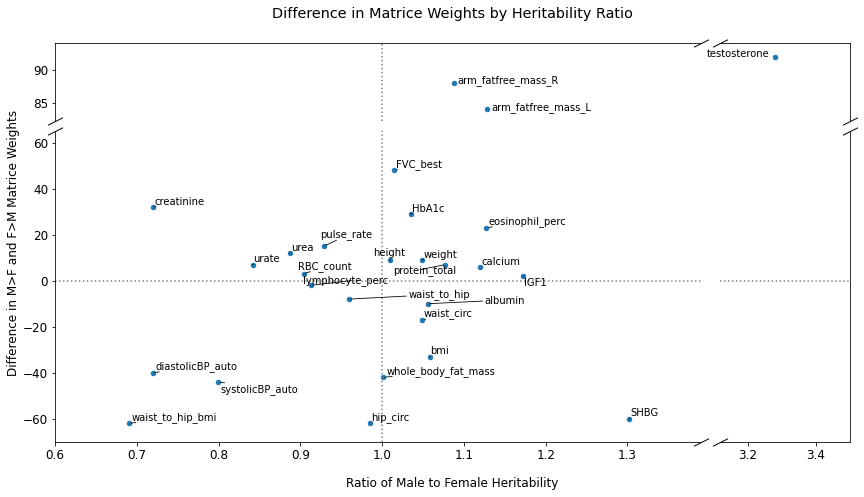

In [20]:
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 2, hspace=0.05, wspace=0.05, width_ratios=[5,1], height_ratios=[1,4])
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

x=df_h2['ratio_h2']
y=df_weights['diff_m-f']

# zoom in per subplots
ax1.scatter(x=x, y=y, s=20)
ax2.scatter(x=x, y=y, s=20)
ax3.scatter(x=x, y=y, s=20)

ax2.set_xlim(3.12, 3.5)  # outliers 
ax2.set_ylim(82.2, 94)
ax3.set_xlim(0.6, 1.39)
ax3.set_ylim(-70, 65.1)

# hide spines
ax1.spines['right'].set_visible(False) ; ax1.spines['bottom'].set_visible(False) ; ax1.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.spines['bottom'].set_visible(False) ; ax2.xaxis.set_visible(False) ; ax2.yaxis.set_visible(False)
ax3.spines['right'].set_visible(False) ; ax3.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False) ; ax4.spines['top'].set_visible(False) ; ax4.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12) ; ax3.tick_params(labelsize=12) ; ax4.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 0], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1], [0, 1], transform=ax4.transAxes, **kwargs)

#annotations
outliers = ['testosterone', 'arm_fatfree_mass_L', 'arm_fatfree_mass_R']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_h2 = df_h2.loc[~df_h2['phenotype'].isin(outliers)].reset_index(drop=True)
main_x=main_h2['ratio_h2']
main_y=main_weights['diff_m-f']
texts = [ax3.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle="-",lw=0.8))

#custom annotation
x_out = df_h2.loc[df_h2.phenotype=='testosterone', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['diff_m-f']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')
x_out = df_h2.loc[df_h2.phenotype=='arm_fatfree_mass_L', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_L', ['diff_m-f']]
texts = ax1.text(x_out.values+0.005,y_out.values+0.01,'arm_fatfree_mass_L')
x_out = df_h2.loc[df_h2.phenotype=='arm_fatfree_mass_R', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_R', ['diff_m-f']]
texts = ax1.text(x_out.values+0.005,y_out.values+0.01,'arm_fatfree_mass_R')

#lines
ax3.axvline(1, ls=":",c="gray") ; ax1.axvline(1, ls=":",c="gray")
ax3.axhline(ls=":",c="gray") ; ax4.axhline(ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Heritability", fontsize='large', labelpad=35)
plt.ylabel("Difference in M>F and F>M Matrice Weights", fontsize='large', labelpad=35)
plt.title("Difference in Matrice Weights by Heritability Ratio", fontsize="x-large", y=1.05)

plt.tight_layout()
plt.savefig("h2ratio_diff.pdf")

#### h2, male

<ipython-input-21-b0a9ba4753ba>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


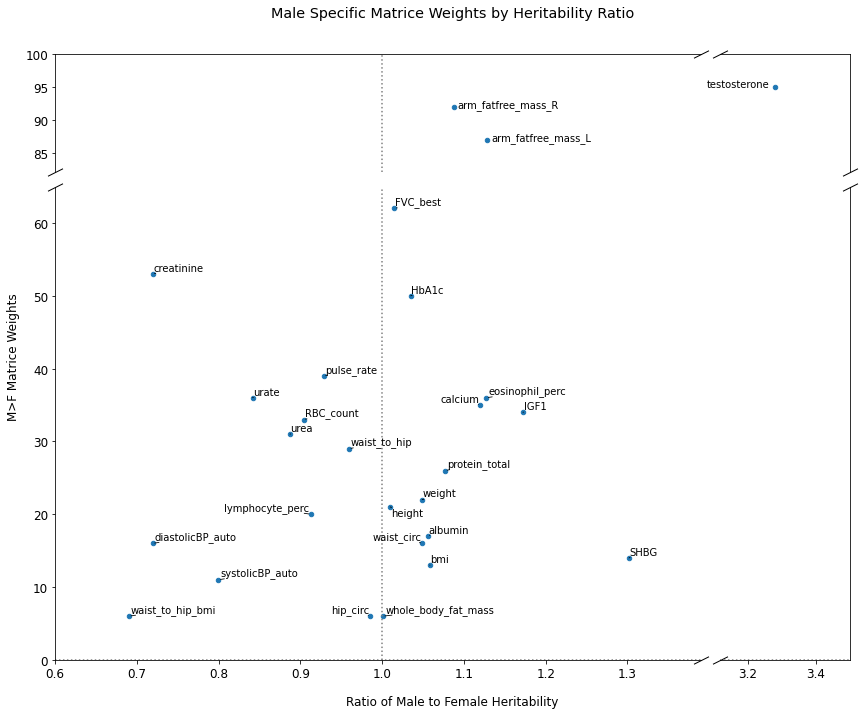

In [21]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, hspace=0.05, wspace=0.05, width_ratios=[5,1], height_ratios=[1,4])
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

x=df_h2['ratio_h2']
y=df_weights['sum_weight_m']

# zoom in per subplots
ax1.scatter(x=x, y=y, s=20)
ax2.scatter(x=x, y=y, s=20)
ax3.scatter(x=x, y=y, s=20)

ax2.set_xlim(3.12, 3.5)  # outliers 
ax2.set_ylim(82.2, 100)
ax3.set_xlim(0.6, 1.39)
ax3.set_ylim(0, 65)

# hide spines
ax1.spines['right'].set_visible(False) ; ax1.spines['bottom'].set_visible(False) ; ax1.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.spines['bottom'].set_visible(False) ; ax2.xaxis.set_visible(False) ; ax2.yaxis.set_visible(False)
ax3.spines['right'].set_visible(False) ; ax3.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False) ; ax4.spines['top'].set_visible(False) ; ax4.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12) ; ax3.tick_params(labelsize=12) ; ax4.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 0], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1], [0, 1], transform=ax4.transAxes, **kwargs)

#annotations
outliers = ['testosterone', 'arm_fatfree_mass_L', 'arm_fatfree_mass_R']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_h2 = df_h2.loc[~df_h2['phenotype'].isin(outliers)].reset_index(drop=True)
main_x=main_h2['ratio_h2']
main_y=main_weights['sum_weight_m']
texts = [ax3.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle="-",lw=0.8))

#custom annotation
x_out = df_h2.loc[df_h2.phenotype=='testosterone', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['sum_weight_m']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')
x_out = df_h2.loc[df_h2.phenotype=='arm_fatfree_mass_L', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_L', ['sum_weight_m']]
texts = ax1.text(x_out.values+0.005,y_out.values+0.01,'arm_fatfree_mass_L')
x_out = df_h2.loc[df_h2.phenotype=='arm_fatfree_mass_R', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='arm_fatfree_mass_R', ['sum_weight_m']]
texts = ax1.text(x_out.values+0.005,y_out.values+0.01,'arm_fatfree_mass_R')

#lines
ax3.axvline(1, ls=":",c="gray") ; ax1.axvline(1, ls=":",c="gray")
ax3.axhline(ls=":",c="gray") ; ax4.axhline(ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Heritability", fontsize='large', labelpad=35)
plt.ylabel("M>F Matrice Weights", fontsize='large', labelpad=35)
plt.title("Male Specific Matrice Weights by Heritability Ratio", fontsize="x-large", y=1.05)

plt.tight_layout()
plt.savefig("h2ratio_m.pdf")

#### h2, female

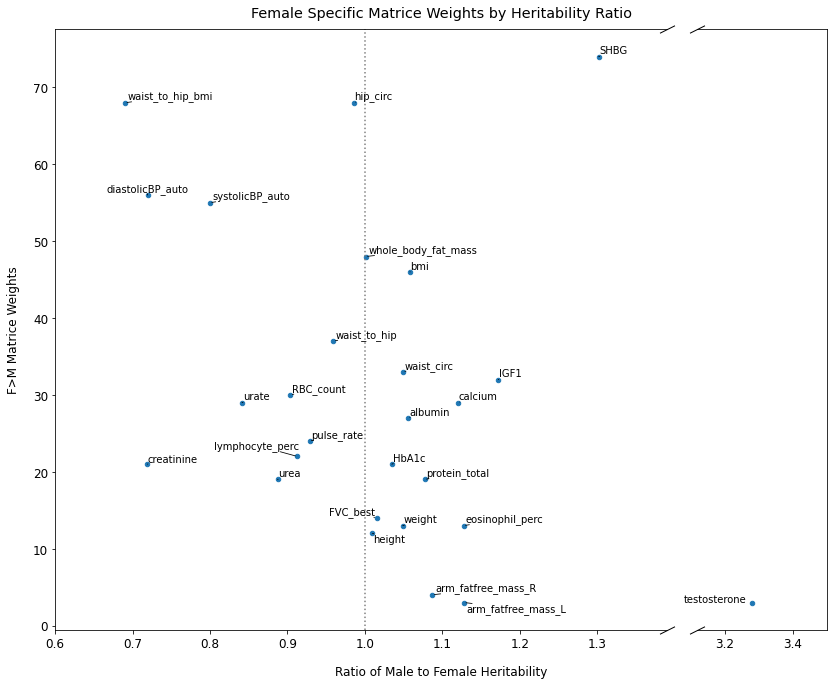

In [22]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 5)
ax1 = fig.add_subplot(gs[:,:4])
ax2 = fig.add_subplot(gs[:,4:5])

x=df_h2['ratio_h2']
y=df_weights['sum_weight_f']

# zoom in per subplots
ax1.scatter(x=x, y=y, s=20)
ax2.scatter(x=x, y=y, s=20)

ax2.set_xlim(3.12, 3.5)  # outliers 
#ax2.set_ylim(6, 80)
ax1.set_xlim(0.6, 1.39)
#ax3.set_ylim(0, 6)

# hide spines
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False) ; ax2.yaxis.set_visible(False)
ax1.tick_params(labelsize=12) ; ax2.tick_params(labelsize=12)

# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

#annotations
outliers = ['testosterone']
main_weights = df_weights.loc[~df_weights['phenotype'].isin(outliers)].reset_index(drop=True)
main_h2 = df_h2.loc[~df_h2['phenotype'].isin(outliers)].reset_index(drop=True)
main_x=main_h2['ratio_h2']
main_y=main_weights['sum_weight_f']
texts = [ax1.text(list(main_x)[i], list(main_y)[i], s=list(main_weights['phenotype'])[i]) for i in range(len(main_x))]
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle="-",lw=0.8))

x_out = df_h2.loc[df_h2.phenotype=='testosterone', ['ratio_h2']]
y_out = df_weights.loc[df_weights.phenotype=='testosterone', ['sum_weight_f']]
texts = ax2.text(x_out.values-0.2,y_out.values+0.01,'testosterone')

#lines
ax1.axvline(1, ls=":",c="gray")

fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Ratio of Male to Female Heritability", fontsize='large', labelpad=35)
plt.ylabel("F>M Matrice Weights", fontsize='large', labelpad=35)
plt.title("Female Specific Matrice Weights by Heritability Ratio", fontsize="x-large", y=1.01)

plt.tight_layout()
plt.savefig("h2ratio_f.pdf")